# Etapas iniciales del proceso de KDD en Python
Este proyecto es un ejemplo de las etapas iniciales del proceso de KDD (Knowledge Discovery in Databases).

Tiene por objetivo mostrar algunas actividades vinculadas al análisis y preprocesamiento de datos en Python y su ecosistema, sobre un caso de estudio sencillo: el famoso [conjunto de datos de Iris](https://es.wikipedia.org/wiki/Conjunto_de_datos_flor_iris) de Fisher o Anderson.

## 1. Comprensión del dominio de aplicación

Esta etapa consiste en conocer el dominio dentro del cual se puede circunscribir al problema así como el objetivo del proceso de extracción de conocimiento.

El dominio en este caso es la [botánica](https://es.wikipedia.org/wiki/Bot%C3%A1nica), rama de la biología que estudia los diversos aspectos de las plantas: descripción, clasificación, distribución, identificación, reproducción, fisiología, morfología, relaciones recíprocas, relaciones con los otros seres vivos y efectos provocados sobre el medio en el que se encuentran.

Particularmente se pretende estudiar la variación morfológica de la [flor de iris](https://es.wikipedia.org/wiki/Conjunto_de_datos_flor_iris) o lirio, para distinguir entre tres especies relacionadas:


<img src="https://drive.google.com/uc?export=view&id=1IJV8RFo_lfedyB3AlDKxllilgcGILQSe" width = 900>


En esta etapa debería recopilar e integrar toda la información que pueda resultar pertinente para el problema. Como se pretende usar rasgos morfológicos, se debería identificar qué atributos de formas y tamaños presentan estas flores como sus pétalos y sépalos:

<img src="https://drive.google.com/uc?export=view&id=1IaATFhw07eHO7BRaBDtns04c1-64SL6Y" width = 450>



## 2. Creación del conjunto de datos de referencia


Como en este caso partimos de un dataset específico como entrada, el conjunto de referencia ya está definido, por lo que todas las tareas asociadas a esta etapa se pueden obviar.

## 3. Limpieza y preparación de datos


En esta etapa vamos a comenzar por conocer los datos, cuáles y de qué tipo son sus atributos, cuántas instancias contiene, cuáles son sus características en términos estadísticos.
Luego indagaremos respecto a la calidad de los datos e intentaremos tratar los problemas detectados.

### 3.1 Análisis exploratorio de datos

Para este ejemplo vamos a utilizar las bibliotecas Pandas, Pyplot de Matplotlib y Seaborn, que comenzamos importando:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Luego carguemos el conjunto de datos a memoria, empleando un DataFrame de Pandas:

In [2]:
ruta = "../data/iris.csv"
iris = pd.read_csv(ruta, delimiter = ',')

En primer lugar podemos examinar la cardinalidad (cantidad de ejemplos) y dimensionalidad (cantidad de atributos) del conjunto de datos haciendo:

In [3]:
iris.shape

(150, 5)

La matriz de datos tiene 150 filas y 5 columnas.

Otra alternativa de revisar esa información sería la siguiente:

In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


En esa tabla se puede ver que las 150 filas correspondían a instancias o ejemplos y las 5 columnas a atributos.
Que la última columna era el atributo de clase (la especie), mientras que los demás atributos caracterizan el largo y ancho de pétalo y sépalo. Esos atributos son números flotantes, mientras que la etiqueta de especie es de tipo objeto.

Otra cosa interesante que podemos preguntarnos es la cantidad de ejemplos que tenemos para cada clase de lirio. Que se puede consultar de la siguiente forma:

In [5]:
iris.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

Vemos que se trata de un dataset balanceado, ya que hay igual cantidad de ejemplo por clase (50).

A continuación se puede ver el contenido de algunas muestras de datos, para seguir conociéndolo:

In [6]:
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


#### 3.1.1 Análisis univariado

Después de haber hecho una revisión básica podemos pasar a obtener los primeros índices estadísticos para tratar de conocer cada atrributo, considerando al conjunto de datos como un todo:

In [7]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


En la tabla se muestra el número de elementos por atributo, sus valores medios, desvío estándar, mínimo, percentil 25%, percentil 50% (mediana), percentil 75% y valor máximo.

De esos resultados se pueden sacar algunas observaciones interesantes:
* Los valores medios muestran que los sépalos son más grandes (largos y anchos) que los pétalos, y que tanto sépalos como pétalos son alargados (más largos que anchos).
* Hay más variabilidad en las dimensiones de los pétalos que de los sépalos.
* Los valores de media y mediana para los sépalos son bastante parecidos, por lo que se podría imaginar que no hay un sesgo grande en su distribución (suponiendo que fuera normal), mientras que para los pétalos el valor de la mediana es mayor que la media lo que indicaría un sesgo negativo, o una cola más larga de la distribución hacia los valores bajos. 

Como se puede ver, aunque no sepamos nada respecto a cómo son las flores de iris, es posible hacerse una idea de algunas características con estos análisis básicos.

Otra forma de revisar las características de los atributos tratando de saber sus distribuciones es mediante análisis visual.

Una de las herramientas más usadas para hacerlo son los histogramas:

In [12]:
sns.displot(iris['sepal_length'])

kde representa los datos mediante una curva de densidad de probabilidad continua

In [9]:
_ = sns.displot(iris['sepal_width'], kde=True)
_

In [10]:
_ = sns.displot(iris['petal_length'], kde=True)

In [11]:
_ = sns.displot(iris['petal_width'], kde=True)

Alternativamente se pueden usar boxplots como otra herramienta de visualización para el análisis univariado:

In [14]:
_ = sns.boxplot(x='species', y='sepal_length', data=iris)

In [15]:
_ = sns.boxplot(x='species', y='sepal_width', data=iris)

In [16]:
_ = sns.boxplot(x='species', y='petal_length', data=iris)

In [17]:
_ = sns.boxplot(x='species', y='petal_width', data=iris)

Podemos tener una primera idea respecto a las características de sépalo y pétalo por clases. Podemos ver que virginica y setosa son las dos clases que más difieren entre sí y que usando los atributos vinculados al pétalo o la longitud de sépalo, es posible diferenciar entre ellas.

Para tratar de corroborar esto con los ínidces estadísticos básicos que vimos anteriormente, comparemos sus valores pero separándolos por especies.
Para las de tipo setosa tenemos:

Para setosa:

In [13]:
(iris.loc[iris.species == "setosa"]).describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


Y para virginica:

In [14]:
(iris.loc[iris.species == "virginica"]).describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


In [15]:
(iris.loc[iris.species == "versicolor"]).describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


Más interesante sería tener en una misma tabla los valores de media y desvíos estándar de cada especie de iris individual y del conjunto de datos.
Para el valor medio se puede hacer:

In [16]:
sp_mean = iris.groupby('species').mean()
to_mean = iris.iloc[:, :4].mean()
means = sp_mean.append(to_mean, ignore_index=True)
means.insert(0, 'species', ['setosa', 'versicolor', 'virginica', 'all_species'])
means

/tmp/ipykernel_7211/3652676416.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  means = sp_mean.append(to_mean, ignore_index=True)


,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.006000,3.418,1.464000,0.244000
1,versicolor,5.936000,2.770,4.260000,1.326000
2,virginica,6.588000,2.974,5.552000,2.026000
3,all_species,5.843333,3.054,3.758667,1.198667


Y para el desvío estándar:

In [17]:
sp_std = iris.groupby('species').std()
to_std = iris.iloc[:, :4].std()
std = sp_std.append(to_std, ignore_index=True)
std.insert(0, 'species', ["setosa", "versicolor", "virginica", 'all_species'])
std



/tmp/ipykernel_7211/1939936738.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  std = sp_std.append(to_std, ignore_index=True)


,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,0.352490,0.381024,0.173511,0.107210
1,versicolor,0.516171,0.313798,0.469911,0.197753
2,virginica,0.635880,0.322497,0.551895,0.274650
3,all_species,0.828066,0.433594,1.764420,0.763161


#### 3.1.2 Análisis bivariado

Para el estudio de las relaciones entre pares de variables puede ser beneficioso visualizar un gráfico de pares de seaborn que aparea cada atributos, distinguiendo por tipo de objeto.
Así se genera una mezcla de gráficos de dispersión bidimensionales, que muestran las relaciones entre las variables, e histogramas univaridos que muestran la distribución de cada variable separada por especies.

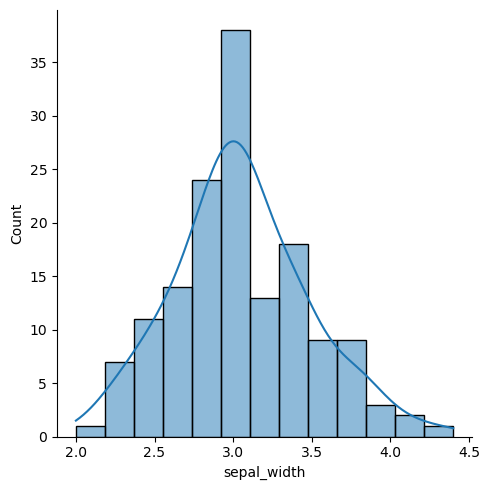

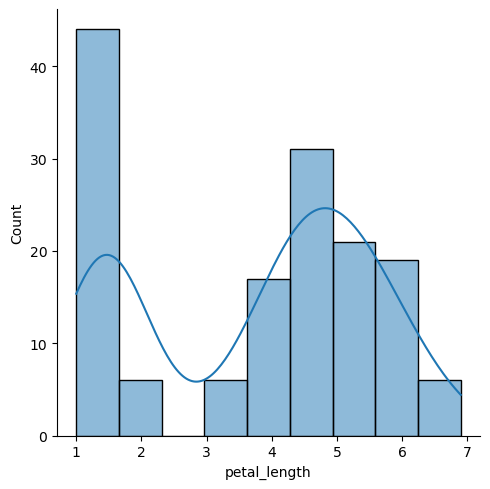

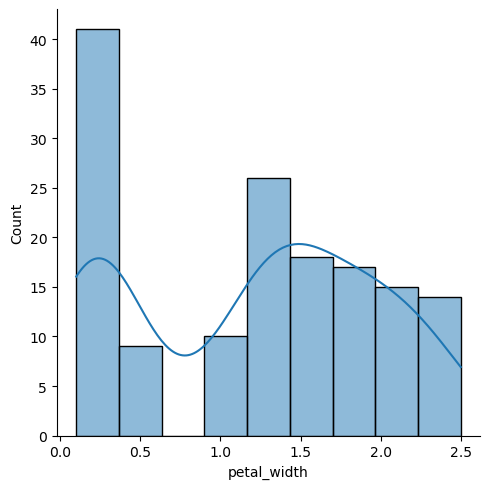

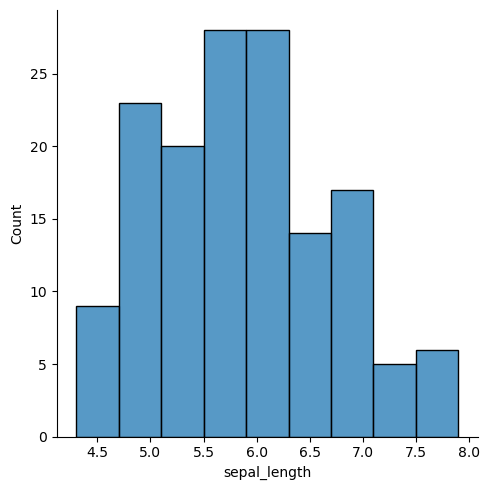

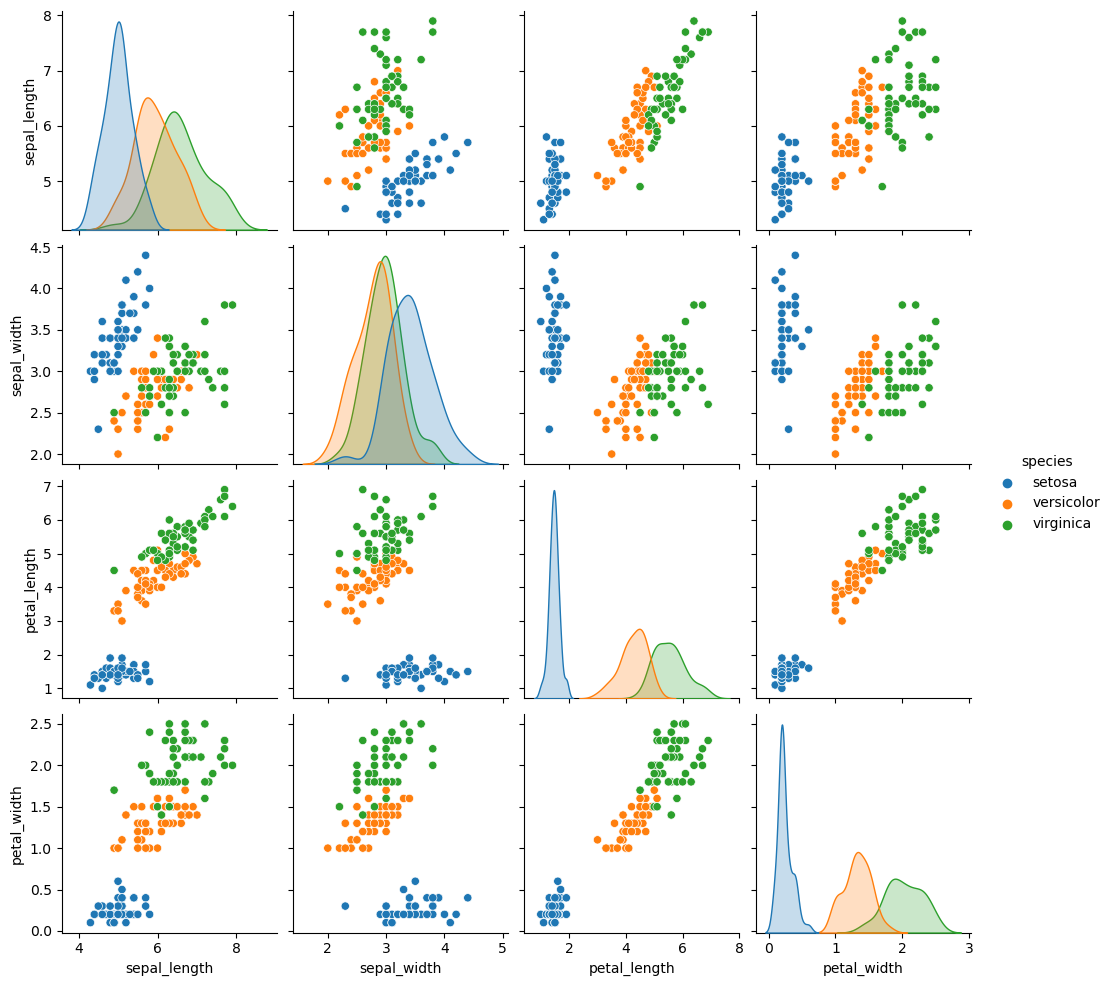

In [18]:
sns.pairplot(iris, hue = 'species') 
plt.show()

Del gráfico anterior se puede ver algunos comportamientos interesantes:
* La clase setosa (azul) parece estar visualmente bastante separado de las otras dos especies en prácticamente todas las combinaciones de atributos, pero más drásticamente en las medidas de los pétalos.
* Se distingue que hay bastante solapamiento entre versicolor (naranja) y virginica (verde), particularmente en términos de medidas de los sépalos.
* La longitud y el ancho de los pétalos y la longitud de los sépalos de la setosa son significativamente menores que las de la versicolor o la virginica, como podemos ver en los histogramas, donde los datos de la setosa están mucho más cerca de la izquierda de cada gráfico.
* Aunque la versicolor y virginica no se distinguen claramente entre sí, las medidas de los pétalos demuestran un patrón en el que la virginica tiende a tener pétalos más largos y anchos que la versicolor. Las medidas de los pétalos de estas especies están mucho más agrupadas cuando se examinan solas, pero cuando se combinan con las medidas de los pétalos, se pueden ver distinciones, ya que las que tienen pétalos más grandes parecen tener también sépalos más grandes.

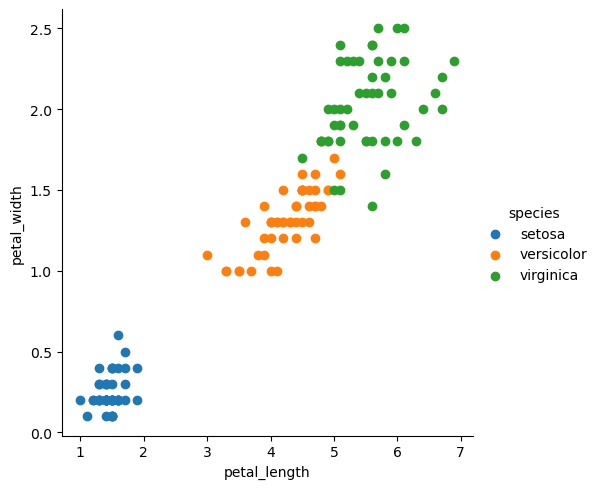

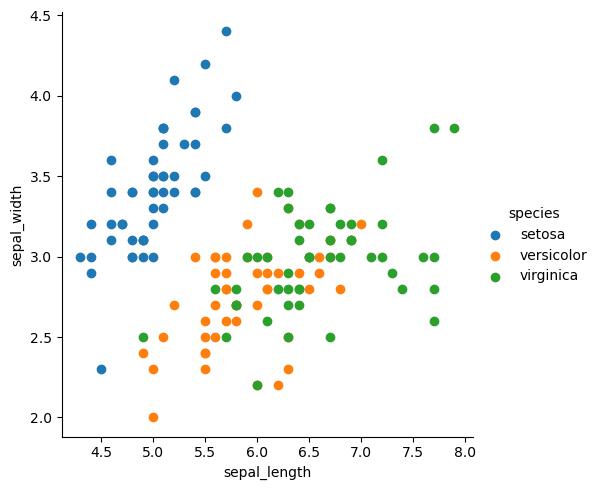

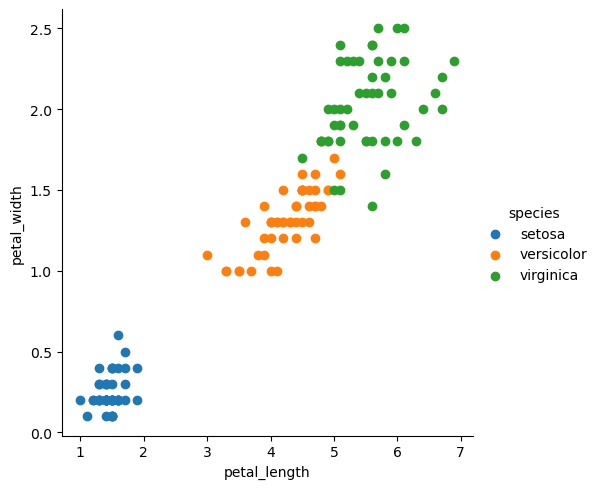

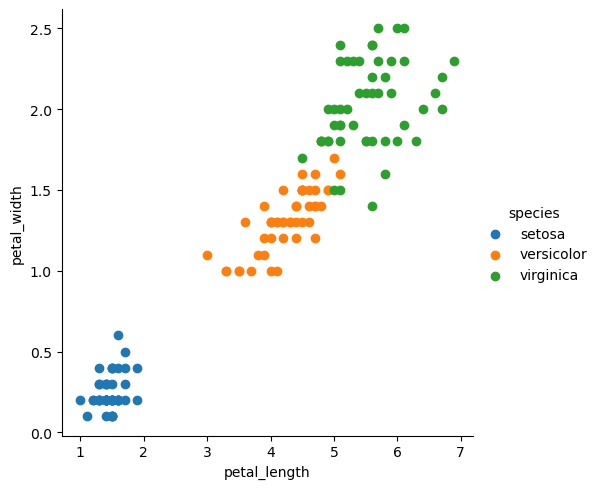

In [22]:
_ = sns.FacetGrid(iris, hue = 'species', height=5).map(plt.scatter, 'petal_length', 'petal_width').add_legend()
plt.show()

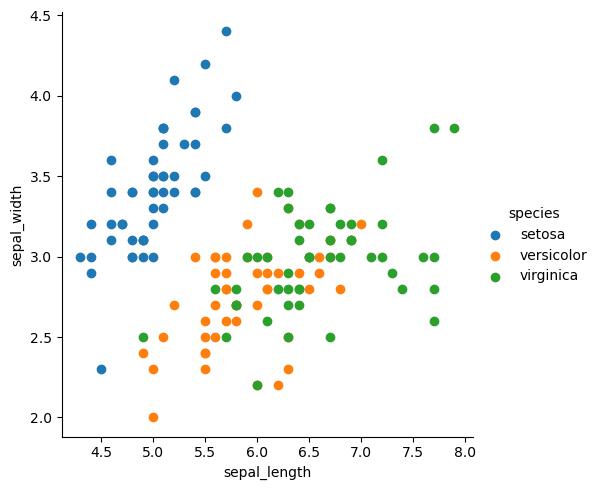

In [23]:
_ = sns.FacetGrid(iris, hue = 'species', height=5).map(plt.scatter, 'sepal_length', 'sepal_width').add_legend()
plt.show()

De lo visto hasta ahora, parece que existe una distinción entre las medidas de los pétalos y de los sépalos.
Otro análisis bivariado muy útil que nos permite estudiar un poco más respecto a este tipo de correlaciones es el de correlación.

**Correlaciones**

In [25]:
iris.corr() # devuelve el grado de similitud que tiene, obviamente para si mismo tendra 1, por otro lado lo que tengan cerca de uno 
            #es porque estan muy correlacionado


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


De esos resultados se puede notar lo siguiente:
* El largo y ancho de los pétalos están muy correlacionadas positivamente (r = 0,96), lo que nos indica que a medida que una aumenta la otra también lo hace
* Las medidas de los sépalos tienen una relación muy débil entre sí (r = -0,1)
* Tanto el largo como el ancho de los pétalos tienen correlaciones positivas muy fuertes con la longitud de los sépalos (r = 0,87 y 0,82 respectivamente), lo que indica que a medida que ambos aumentan de tamaño, también lo hace la longitud de los sépalos
* Tanto el largo como el ancho de los pétalos tienen correlaciones negativas bastante débiles con el ancho del sépalo (r = -0,42 y -0,36 respectivamente), lo que indica que no hay mucha relación entre estas características
* Estas correlaciones nos indican que la anchura del sépalo no está correlacionada moderada o significativamente con ninguna otra variable


Esas correlaciones también se pueden visualizar con un mapa de calor:

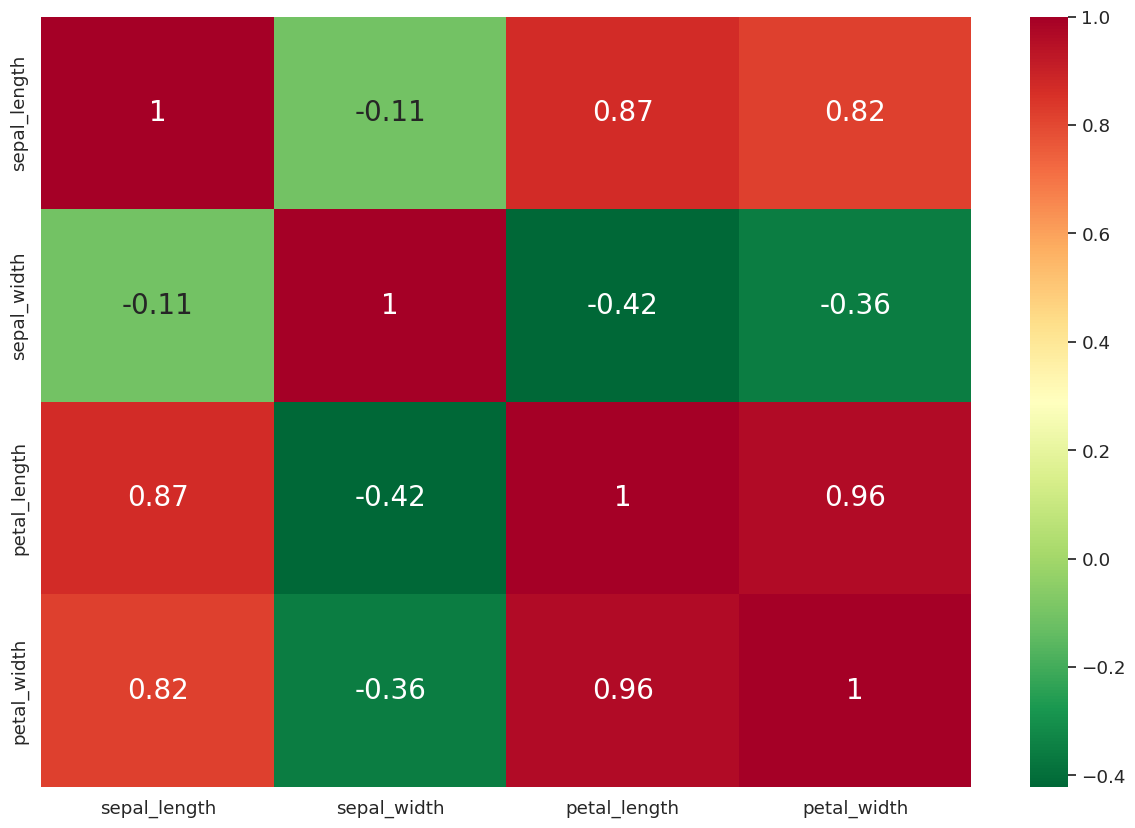

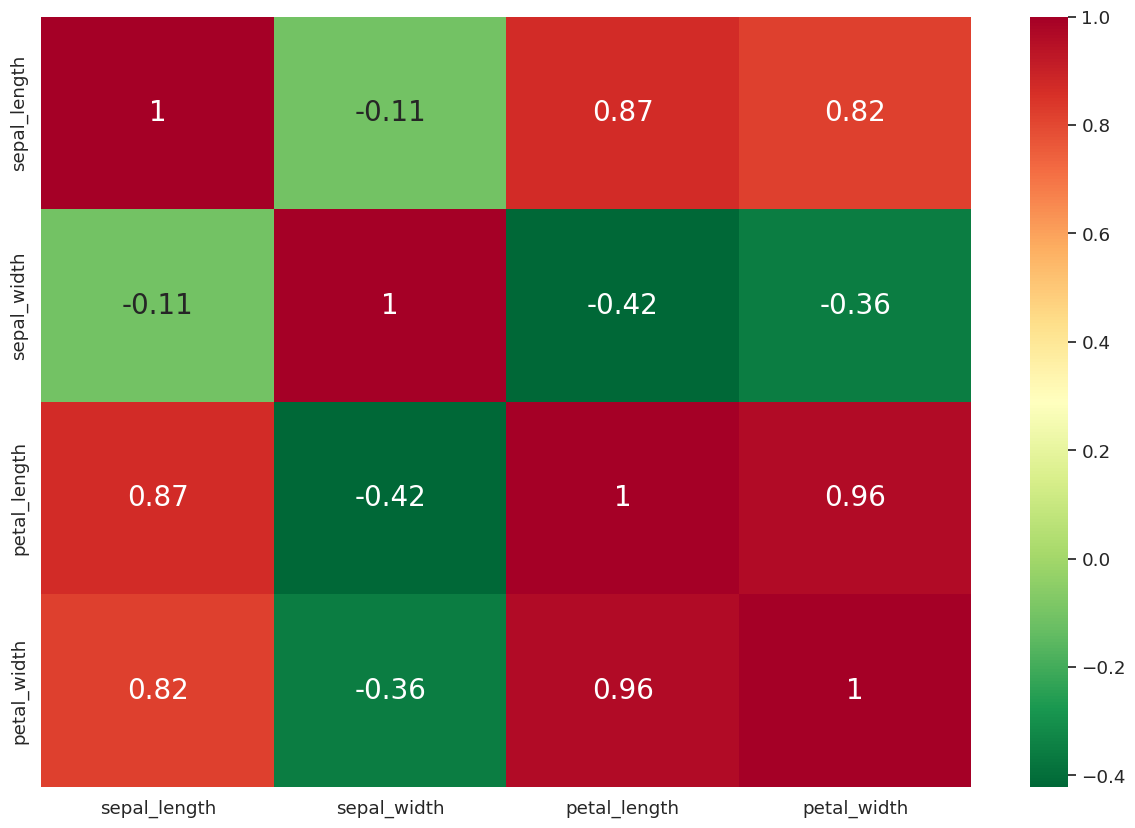

In [29]:
plt.figure(figsize=(15,10))
sns.set(font_scale = 1.2)
_ = sns.heatmap(iris.corr(), annot = True, cmap = 'RdYlGn_r', annot_kws={"size": 20}) 
plt.show()

La gran cantidad de cuadrados rojos y naranjas muestra que la mayoría de las mediciones están muy correlacionadas entre sí, excepto el ancho del sépalo

Resulta también interesante indagar qué sucede con estas correlaciones entre atributos pero considerando a cada especie por separado.

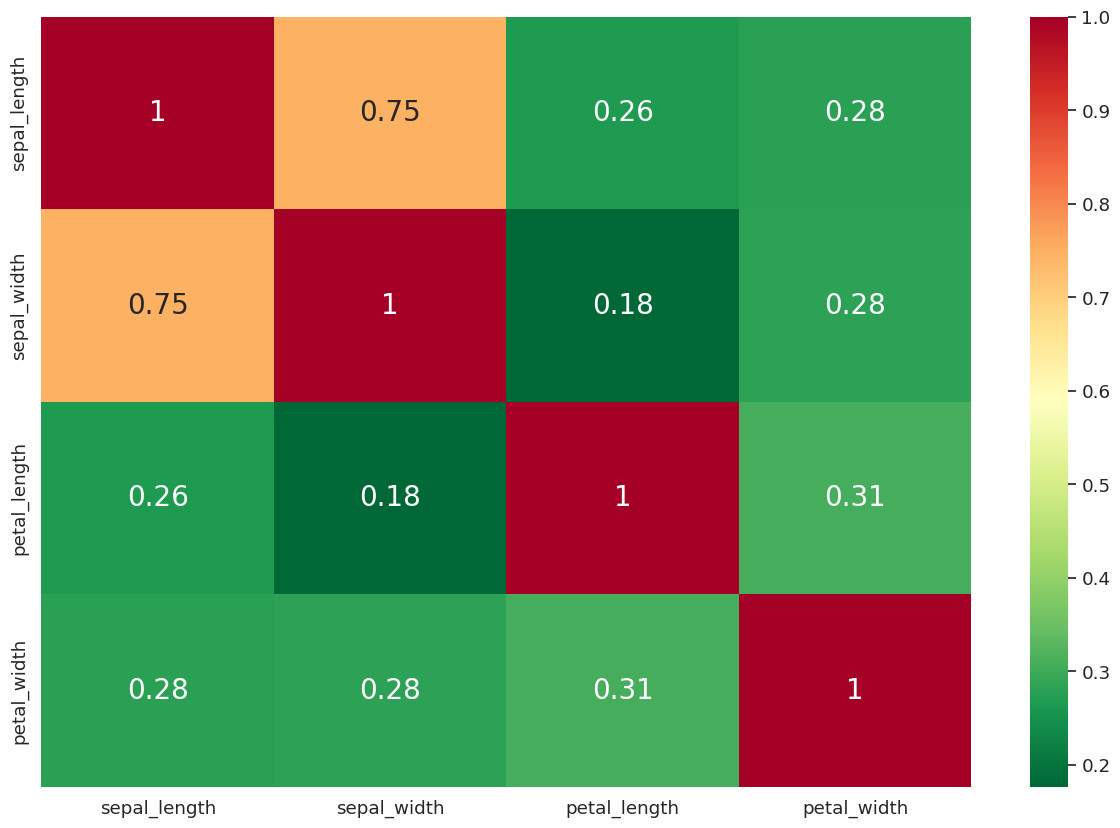

In [30]:
plt.figure(figsize=(15,10))
sns.set(font_scale = 1.2)
setosa = iris.loc[iris.species == "setosa"]
_ = sns.heatmap(setosa.corr(), annot=True, cmap='RdYlGn_r', annot_kws={"size": 20}) 
plt.show()

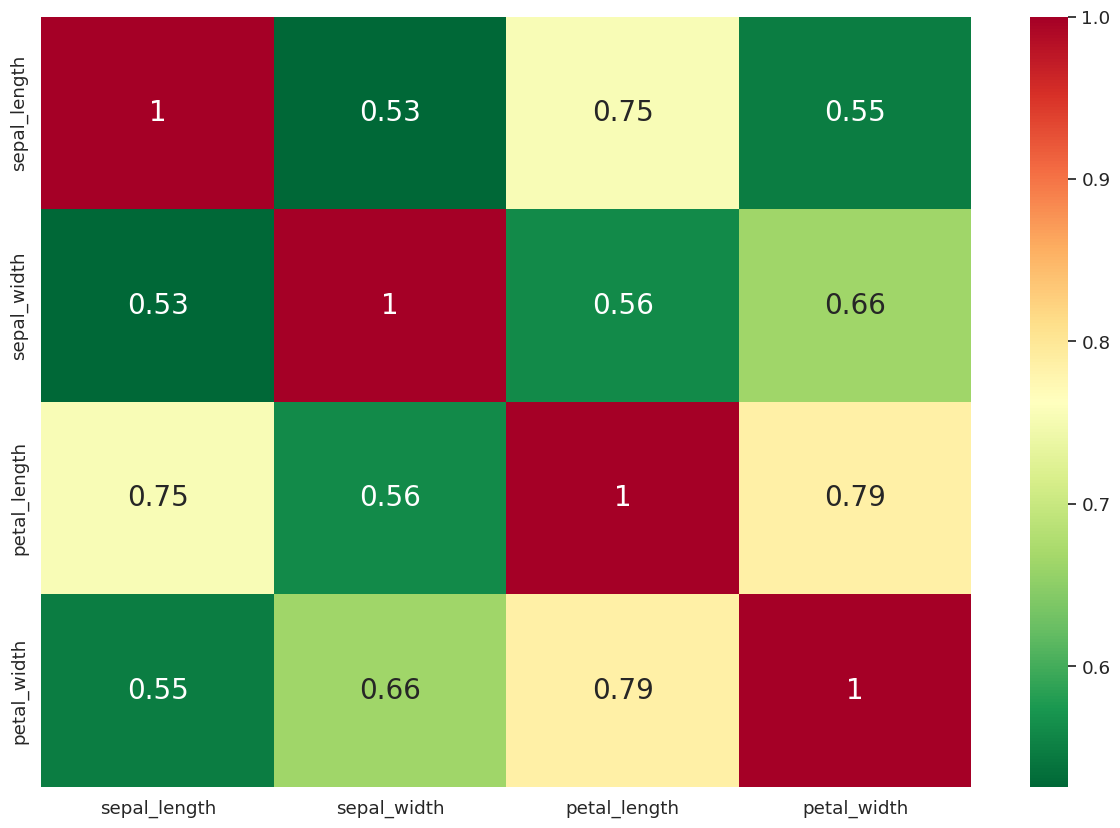

In [31]:
plt.figure(figsize=(15,10))
sns.set(font_scale = 1.2)
versicolor = iris.loc[iris.species == "versicolor"]
_ = sns.heatmap(versicolor.corr(), annot=True, cmap='RdYlGn_r', annot_kws={"size": 20}) 
plt.show()

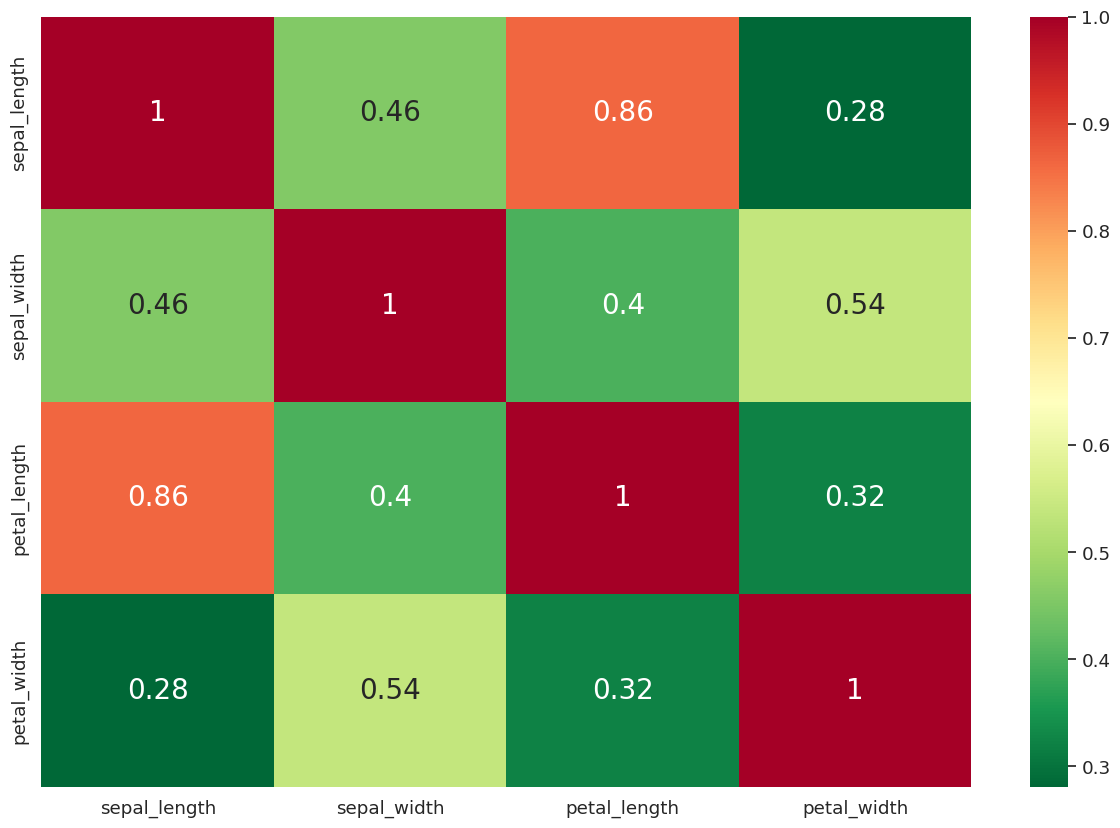

In [32]:
plt.figure(figsize=(15,10))
sns.set(font_scale = 1.2)
virginica = iris.loc[iris.species == "virginica"]
sns.heatmap(virginica.corr(), annot=True, cmap='RdYlGn_r', annot_kws={"size": 20}) 
plt.show()

De estos análisis de correlaciones por especies se puede observar:
* Mientras que el conjunto de datos mostró una correlación positiva grande entre largo y ancho de los pétalos (r = 0,96), versicolor es la única especie que mantiene una correlación alta (r = 0,79) si se los desacopla por especies. Tanto setosa (r = 0,31) como virginica (r = 0,32) tienen correlaciones mucho más bajas entre ancho y largo de los pétalos.
* La correlación negativa muy débil observada entre ancho y largo global de los sépalos (r = -0,11), ahora se convirtió en positiva. Setosa tiene correlaciones positivas fuertes entre los sépalos (r = 0,75), mientras que versicolor (r = 0,53) y virginica (r = 0,46) tienen correlaciones positivas moderadas. Es posible que la correlación débil observada inicialmente en los valores de sépalos se deba las de clase setosa, que tiene un mayor ancho promedio de los sépalos mientras que es menor en todas las demás características.
* En las correlaciones iniciales, la longitud del pétalo (r = 0,87) y la anchura (r = 0,82) demostraron fuertes correlaciones positivas con la longitud del sépalo. Con las especies individuales, la anchura del pétalo y la longitud del sépalo mantienen correlaciones positivas débiles en setosa (r = 0,28) y virginica (r = 0,28) y una correlación positiva moderada en versicolor (r = 0,55). La longitud de los pétalos y de los sépalos sigue estando muy correlacionada en versicolor (r = 0,75) y virginica (r = 0,86), pero de nuevo se observa una correlación muy débil con setosa (r = 0,26).

Algunas de estas discrepancias de correlación se podrían deber a diferencias sistemáticas entre las flores, es decir, en la población, a medida que algunos rasgos aumentan, los demás también tienden a crecer, pero no puede decirse lo mismo de las especies individuales. Sin embargo, estos cambios también demuestran la paradoja de Simpson, que es un fenómeno de la estadística por el que las tendencias observadas en el conjunto de la población pueden desaparecer o invertirse cuando la población se desglosa por categorías. La identificación de esta paradoja y las razones que la explican pueden ser bastante complejas.

### 3.2 Limpieza de datos

A continuación se evalúa la calidad de los datos, tratando de determinar si hay problems de errores, datos redundantes, incompletos, inconsistencias. En caso que puedan encontrarse algunos de esos problemas es posible intentar subsanarlos.

#### 3.2.1 Detección de datos erróneos

En este caso todos los atributos excepto el de clase se corresponden a longitudes. Una forma obvia de controlar la presencia de datos erróneos sería ver si existen valores que físicamente resulten imposibles, como longitudes negativas o superiores a digamos 20 cm. Revisando en el resumen general de estadísticos descriptivos vemos que a partir del rango de cada atributo no se distinguen ese tipo de errores.

#### 3.2.2 Detección de outliers

Una de las alternativas para la detección de outliers es utilizar los boxplots ya generados para ver en qué atributos quedan puntos por fuera de los límites de los bigotes.

Mediante esa estrategia se pueden distinguir:
* Para longitud de sépalo, 1 oulier en virgínicas.
* En ancho de sépalo 2 outliers en virgínica.
* Para largo de pétalo, se pueden distinguir 2 outliers para setosa y 1 para versicolor.
* Para ancho de pétalo se encuentran 2 casos para la clase setosa

Veamos ahora algún método para hacer la detección de forma numérica:

**Z-Score**

Se aplica una transformación para convertir los datos en otro dataset con media 0.

$$Z=\frac{x_i - \bar{x}}{\sigma}$$

Una vez convertidos los datos, el centro pasa a ser 0 y el valor z correspondiente a cada dato representa la distancia desde el centro en términos del desvío estándar. Por ejemplo, un valor z de 2,5 indica que el dato se encuentra a 2,5 desviaciones estándar de la media. Por lo general, un valor z =3 se considera al límite. Por lo tanto, cualquier valor de z superior a +3 o inferior a -3 se considera un valor atípico.


In [45]:
# Z-Score

from scipy import stats
import numpy as np

z = np.abs(stats.zscore(iris.loc[:, ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]))

threshold = 3
print(z)
print(np.where(abs(z) > 3))


     sepal_length  sepal_width  petal_length  petal_width
0        0.900681     1.032057      1.341272     1.312977
1        1.143017     0.124958      1.341272     1.312977
2        1.385353     0.337848      1.398138     1.312977
3        1.506521     0.106445      1.284407     1.312977
4        1.021849     1.263460      1.341272     1.312977
..            ...          ...           ...          ...
145      1.038005     0.124958      0.819624     1.447956
146      0.553333     1.281972      0.705893     0.922064
147      0.795669     0.124958      0.819624     1.053537
148      0.432165     0.800654      0.933356     1.447956
149      0.068662     0.124958      0.762759     0.790591

[150 rows x 4 columns]
(array([15]), array([1]))


Para ver el dato detectado como outlier se puede hacer:

In [34]:
print(iris.iloc[15,:])

sepal_length       5.7
sepal_width        4.4
petal_length       1.5
petal_width        0.4
species         setosa
Name: 15, dtype: object


Como se puede ver, encuentra que el ancho del sépalo de 4.4 es un valor atípico.

In [35]:
iris[iris["species"]=="setosa"].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


La remoción de los outliers encontrados se hace de la siguiente forma:

In [38]:
iris2 = iris[ (abs(z) < 3).all(axis=1) ] #para todo elemento cuya valor absoluto de z sea menor a 3, en las columnas (axis=1)
iris2.shape

(149, 5)

**IQR**

El rango intercuartil (IQR), también llamado midspread o middle 50%,es igual a la diferencia entre los percentiles 75 y 25, o entre los cuartiles superior e inferior, IQR = Q3 - Q1.

Se define el intervalo normal de datos con límite inferior igual $Q1-1,5*IQR$ y límite superior como $Q3+1,5*IQR$. 

Cualquier dato fuera de este rango, se considera outlier.

In [39]:
Q1 = iris.quantile(0.25)
Q3 = iris.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

sepal_length    1.3
sepal_width     0.5
petal_length    3.5
petal_width     1.5
dtype: float64


La remoción de los outliers encontrados se hace de la siguiente forma:

In [40]:
iris3 = iris.iloc[:, :-1 ]
iris3 = iris3[ ~( (iris3 < (Q1 - 1.5 * IQR) ) | ( iris3 > (Q3 + 1.5 * IQR)) ).any(axis=1) ]
iris3.shape


(146, 4)

#### 3.2.3 Detección de datos faltantes

Para determinar si existen datos faltantes en el dataset se puede hacer:

In [41]:
iris.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

Si hubiera datos faltantes se podría determinar la cantidad por atributo de la siguiente forma:

In [42]:
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Si hubiera valores NaN, se podría emplear el procedimiento de imputación de reemplazo por el valor medio de la variable correspondiente de la siguiente manera:

In [43]:
for column in iris.columns[0:-1]:
    iris[column].fillna(value=iris[column].mean(), inplace=True)

## 4. Reducción y proyección de datos


En este caso no tenemos demasiadas variables como para preocuparnos por eliminarlas o transformarlas.
En otro tipo de datos, generalmente se debería analizar aplicar este tipo de tratamiento.